# DATA SCIENCE PROJECT
`Hoang Bui 02-12-2019`

## 1. Introduction

<div align="center">
    <img src="https://upload.wikimedia.org/wikipedia/commons/6/69/Airbnb_Logo_B%C3%A9lo.svg" width="200" height="121" alt="Aibnb Logo"/>
</div>

**Airbnb, Inc.** is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences [wiki](https://en.wikipedia.org/wiki/Airbnb). The name comes from ***"air mattress B&B”*** It currently covers more than 81,000 cities and 191 countries worldwide. **Airbnb** haved provided a new personalize way to tourims experience in staying, espescially homestays and today, **Airbnb** became one of a kind service that is used and recognized by the whole world.

These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. In this kernel, we will observe Amstedam 2019 dataset, provided by Airbnb, the original source can be found on [website](http://insideairbnb.com/get-the-data.html)

**There are 3 questions we need to answer through this dataset:**
* Describe some insides about the listing in Amsterdam?
* How does current infomation affect to the price of the listing?
* Can we use listing features to predict housing price of the stays?

## 2. Geting started

### 2.1 Prerequired

* scikit-learn
* pandas
* seaborn
* scipy

### 2.2 import libraries and data

In [494]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib   
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import math
from sklearn.compose import ColumnTransformer

In [495]:
data = pd.read_csv("listings.csv")
data.head()     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,269,2019-09-03,2.11,1,70
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,80,1,288,2019-08-28,2.48,2,167
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,3,2019-05-11,0.15,2,58
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38673,4.89208,Private room,155,2,200,2019-09-12,2.14,1,264
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36719,4.89092,Private room,75,2,295,2019-09-10,2.67,3,123


**Data Explaination**
* **id**: listing ID
* **name**: name of the listing
* **host_id**: host ID
* **host_name**: name of the host
* **neighbourhood_group**: location
* **neighbourhood**: area
* **latitude**: latitude coordinates
* **longitude**: longitude coordinates
* **room_type**: listing space type
* **price**: price in dollars
* **minimum_nights**: amount of nights minimum
* **number_of_reviews**: number of reviews
* **last_review**: latest review
* **reviews_per_month**: number of reviews per month
* **calculated_host_listings_count**: amount of listing per host
* **availability_365**: number of days when listing is available for booking

## 3. Understand and Analyze data

### 3.1 Understanding our dataset

In [496]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20244 entries, 0 to 20243
Data columns (total 16 columns):
id                                20244 non-null int64
name                              20209 non-null object
host_id                           20244 non-null int64
host_name                         20239 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     20244 non-null object
latitude                          20244 non-null float64
longitude                         20244 non-null float64
room_type                         20244 non-null object
price                             20244 non-null int64
minimum_nights                    20244 non-null int64
number_of_reviews                 20244 non-null int64
last_review                       17902 non-null object
reviews_per_month                 17902 non-null float64
calculated_host_listings_count    20244 non-null int64
availability_365                  20244 non-null int64
dt

***Overviews***:
* Dataset contains 20244 rows
* There are some nullable fields: name, host_name, neighbourhood_group, last_review, reviews_per_month
* **neighbourhood** doesn't contain any data

Then we need to do some pre-process steps:

* remove neighbourhood_group column

In [497]:
data = data.drop("neighbourhood_group", axis="columns")

* fill NAN values of **name**, **host_name**, and zero values of **last_review**, **reviews_per_month**

In [498]:
data['name'].fillna("DEFAULT", inplace=True)           
data['host_name'].fillna("DEFAULT", inplace=True)
data["last_review"].fillna(0, inplace=True)
data["reviews_per_month"].fillna(0, inplace=True)

In [491]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20244 entries, 0 to 20243
Data columns (total 15 columns):
id                                20244 non-null int64
name                              20244 non-null object
host_id                           20244 non-null int64
host_name                         20244 non-null object
neighbourhood                     20244 non-null object
latitude                          20244 non-null float64
longitude                         20244 non-null float64
room_type                         20244 non-null object
price                             20244 non-null int64
minimum_nights                    20244 non-null int64
number_of_reviews                 20244 non-null int64
last_review                       20244 non-null object
reviews_per_month                 20244 non-null float64
calculated_host_listings_count    20244 non-null int64
availability_365                  20244 non-null int64
dtypes: float64(3), int64(7), object(5)
memory usage: 2

Before take analysis, we need to transform some categorical columns to categorical code:

In [492]:
data['neighbourhood'] = data['neighbourhood'].astype("category").cat.codes
data['room_type'] = data['room_type'].astype("category").cat.codes
print("neighbourhood values:", data['neighbourhood'].unique())
print("room_type values:", data['room_type'].unique())

neighbourhood values: [14  4  5 21  8  7  2 20 17 13 18 16 10 19 11 12  9  1  3  6 15  0]
room_type values: [2 0 1 3]


### 3.2 Analysis

***1. Distribution of room_type***

In [445]:
data.room_type.value_counts()

0    15880
2     3850
1      461
3       53
Name: room_type, dtype: int64

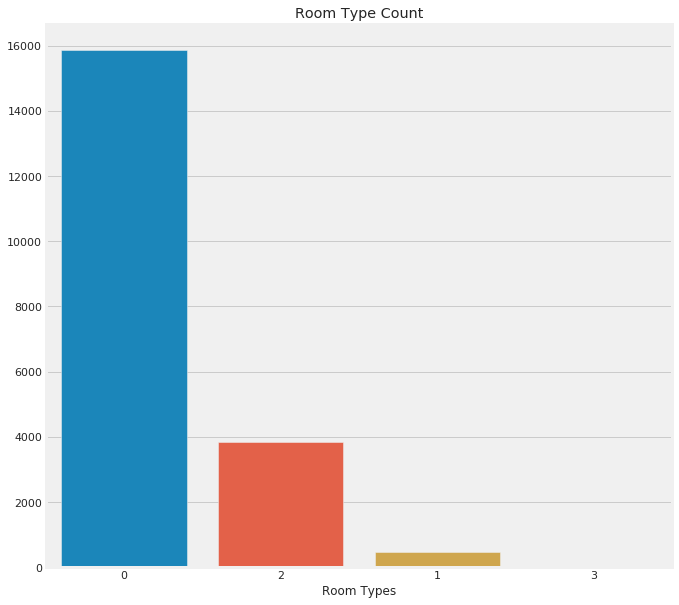

In [446]:
plt.figure(figsize=(10,10))
room_type_plot = sb.countplot(x="room_type", order = data.room_type.value_counts().index, data=data)
room_type_plot.set(xlabel='Room Types', ylabel='', title='Room Type Count')
plt.show()

**Discussion:**
* Almost rooms in Airbnb are home/aptment or private room whilst shared room and hotel room take a minor amount
* It's obviously that all the people who rent an Airbnb prefer an entire home !

***2. Neighborhood in Amstedam***

In [484]:
data.neighbourhood.value_counts().head(5)

De Baarsjes - Oud-West     3480
De Pijp - Rivierenbuurt    2490
Centrum-West               2249
Centrum-Oost               1777
Westerpark                 1514
Name: neighbourhood, dtype: int64

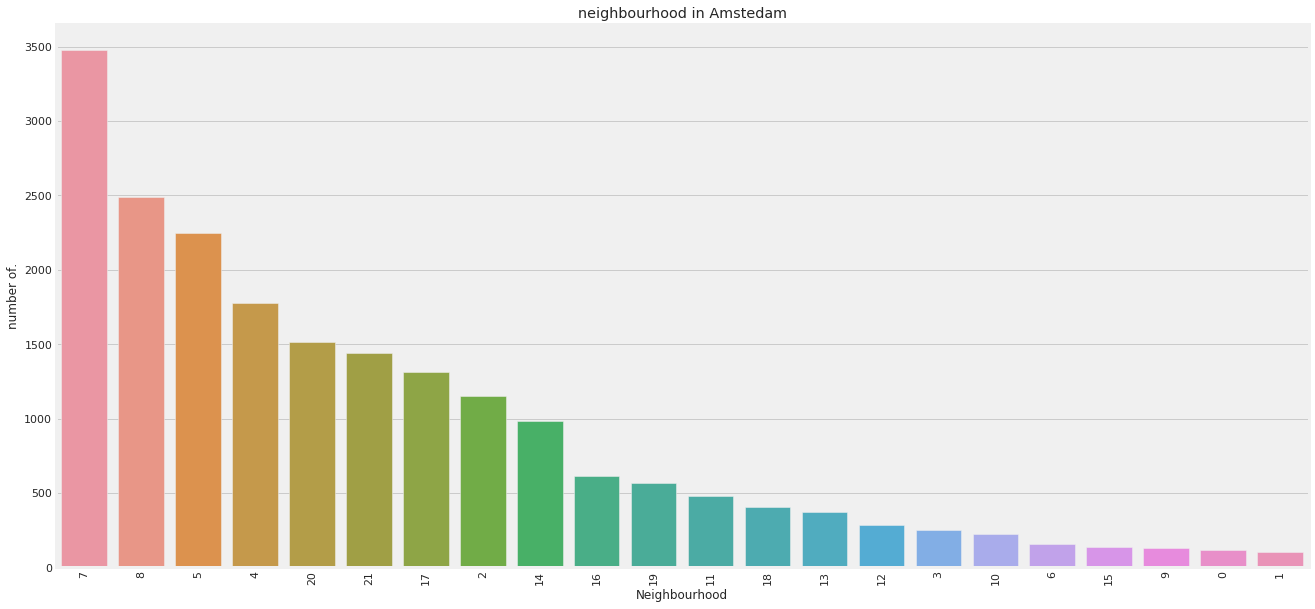

In [448]:
plt.figure(figsize=(20,10))
room_type_plot = sb.countplot(x="neighbourhood", order = data.neighbourhood.value_counts().index, data=data)
room_type_plot.set(xlabel='Neighbourhood', ylabel='number of.', title='neighbourhood in Amstedam')
room_type_plot.set_xticklabels(data.neighbourhood.value_counts().index,rotation=90)
plt.show()

***Neighbourhood with price in Amstedam***

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


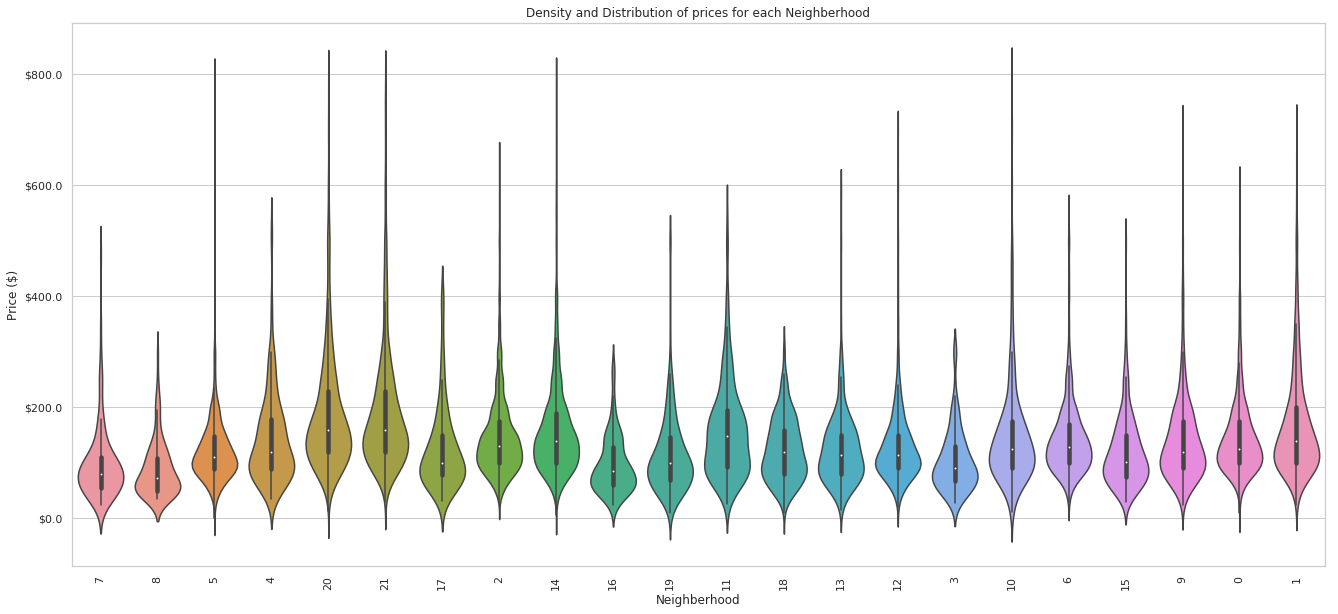

In [449]:
sb.set(style="whitegrid")
FILTER_PRICE_VALUE = 800

sub_data = data[data.price < FILTER_PRICE_VALUE]

fig, ax = plt.subplots(figsize=(20, 10))
density_neigh_price_plot = sb.violinplot(ax=ax, x="neighbourhood", y="price", 
                                        hue="neighbourhood", data=sub_data, dodge=False)
density_neigh_price_plot.set(xlabel='Neighberhood', ylabel='Price ($)', 
                             title='Density and Distribution of prices for each Neighberhood')
ylabels = ['${}'.format(x) for x in density_neigh_price_plot.get_yticks()]
density_neigh_price_plot.set_yticklabels(ylabels)
density_neigh_price_plot.set_xticklabels(data.neighbourhood.value_counts().index,rotation=90)
density_neigh_price_plot.legend_.remove()
plt.show()


**Discussion:**
* Arcording to the **"Neighborhood in Amstedam"** bar chart and **"Density and Distribution of prices for each Neighberhood"** violin chart, we can set up that there are some neighbourhood have higher average listing price such as **Noord-Oost** or **De Pijp - Rivierenbuurt**, whilst some area with fewer number of listing have lower price/night also.
* **30%** of areas take more than **70%** of listing
* If you'd like to pick a crowdy area with most airbnb listing or prefer the lower budget with the lower price/night, let consider **De Baarsjes - Oud-West** 

***3. Price***

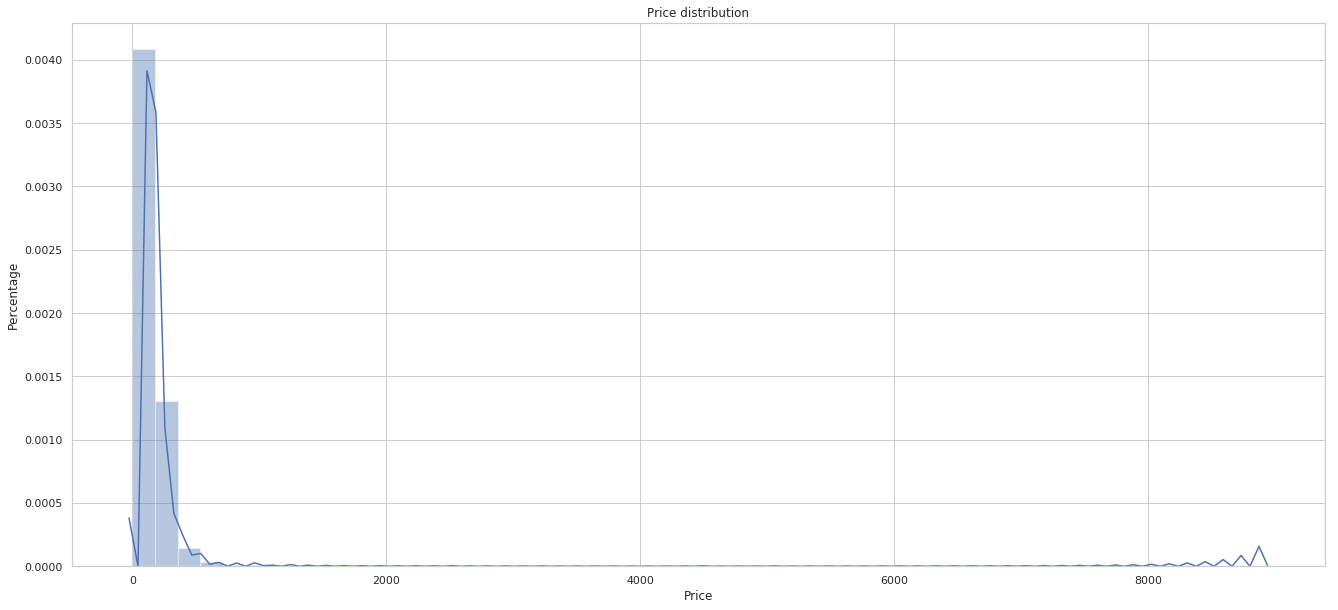

In [450]:
plt.figure(figsize=(20,10))
price_plot = sb.distplot(data['price'])
price_plot.set(xlabel='Price', ylabel='Percentage', 
                             title='Price distribution')
plt.show()

Airbnb renting price in Amsterdam is quite converging, but there are some outliers listing have quite expensive than others. We are going to observe the converging and the outlier part

In [451]:
coverged_data = data[data["price"] < 500]
outliers_data = data[data["price"] > 500]
print("Outliers listing price takes {}% of dataset".format(len(outliers_data)/len(data) * 100))

Outliers listing price takes 1.2942106303102154% of dataset


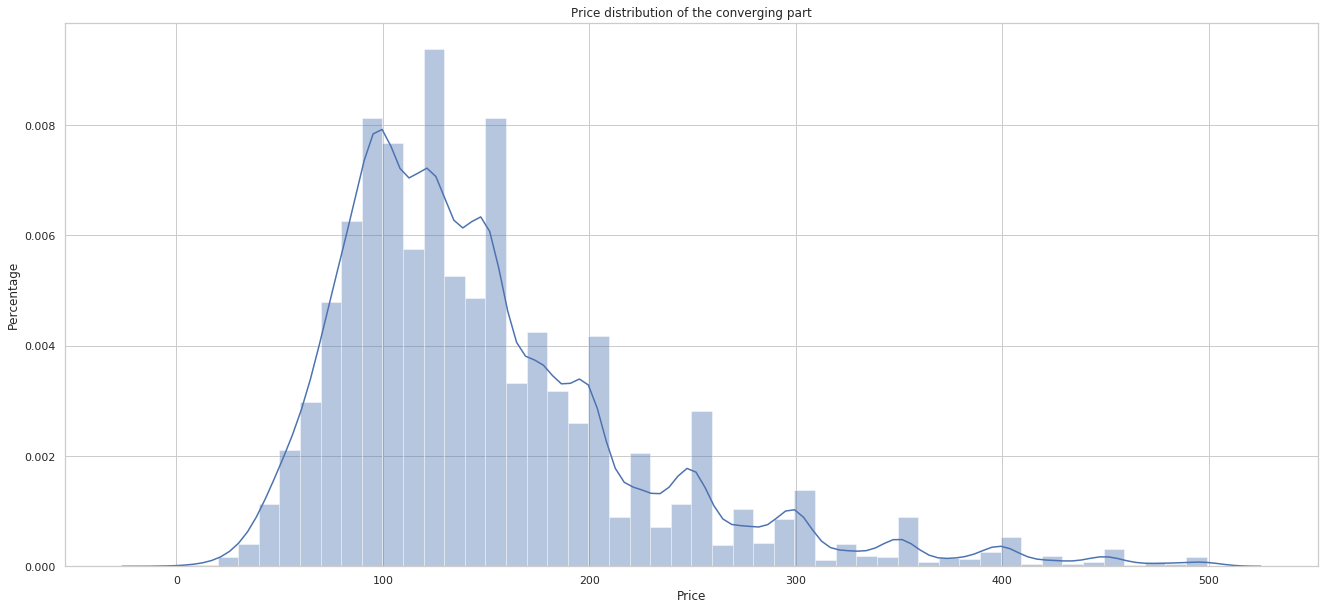

In [452]:
plt.figure(figsize=(20,10))
price_plot = sb.distplot(coverged_data['price'])
price_plot.set(xlabel='Price', ylabel='Percentage', 
                             title='Price distribution of the converging part')
plt.show()

***Discussion:***
* With the budget from 50 to 300 USD per night, you are able to rent almost 95% of house in Airbnb

***4. Geomatric***

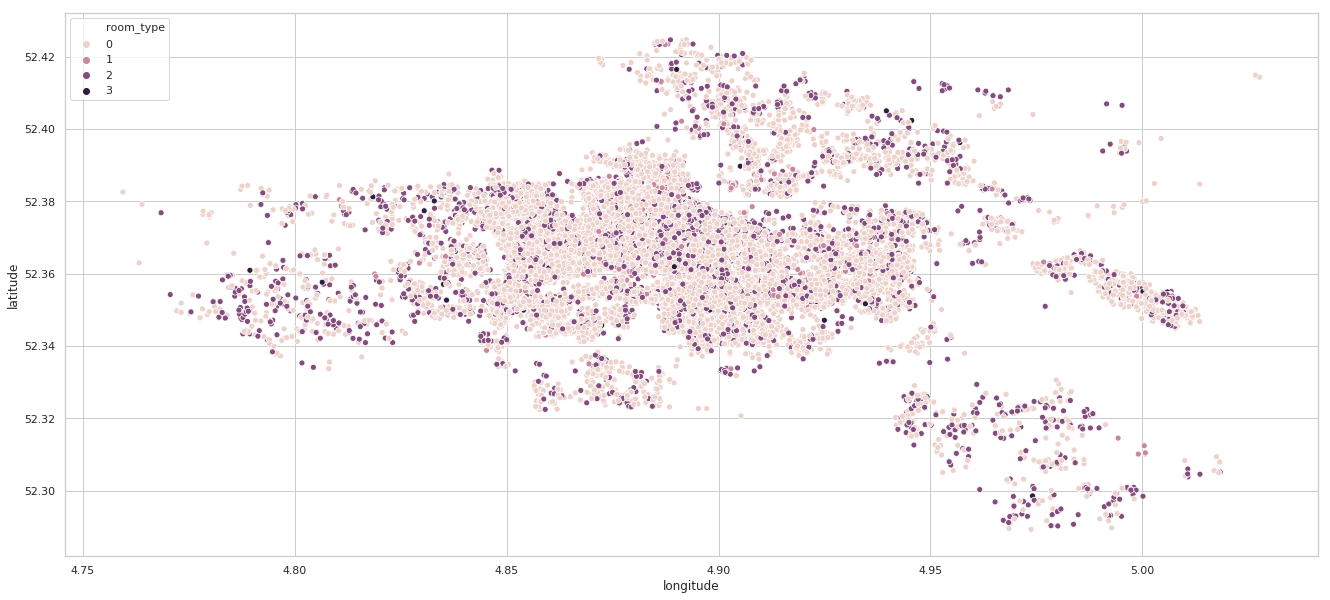

In [453]:
plt.figure(figsize=(20,10))
price_plot = sb.scatterplot(x="longitude", y="latitude", hue="room_type", data=data)
plt.show()

From this **"map"**, we can observe the crowdy in the middle of Amstedam. There are alot of entire home and apartment for you to rent, where can easy to go around the city

## 4. Price prediction

**Preparation**

There are some features we need to normalized before starting training. Let's take a closer look at:

***a. price***

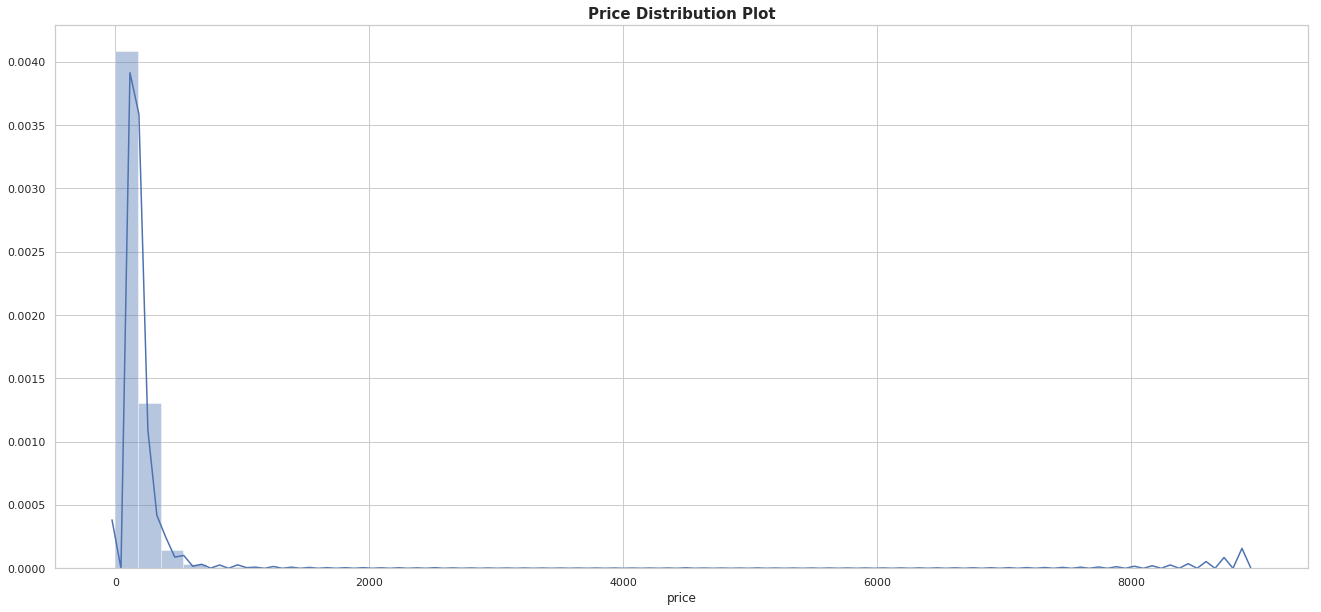

In [363]:
plt.figure(figsize=(20,10))
price_plot = sb.distplot(data['price'])
plt.title("Price Distribution Plot",size=15, weight='bold')
plt.show()

The graph shows that there is a right-skewed distribution on **price**, log transformation will be used to make less skewed. There are some benefits of **log** transformation:
* avoid overfitting
* to normal distribution

Since division by zero is a problem, log+1 transformation would be better.

In [364]:
data['price_log'] = np.log(data.price+1)

And plot again:

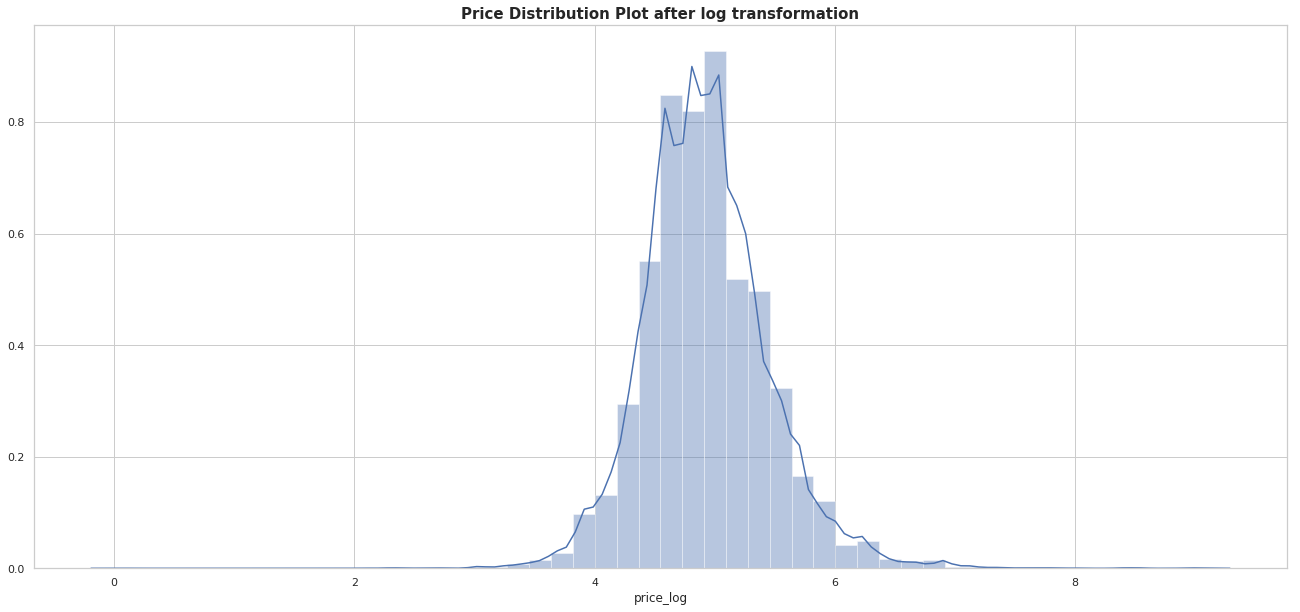

In [365]:
plt.figure(figsize=(20,10))
price_plot = sb.distplot(data['price_log'])
plt.title("Price Distribution Plot after log transformation",size=15, weight='bold')
plt.show()

In below graph shows normality is a reasonable approximation.

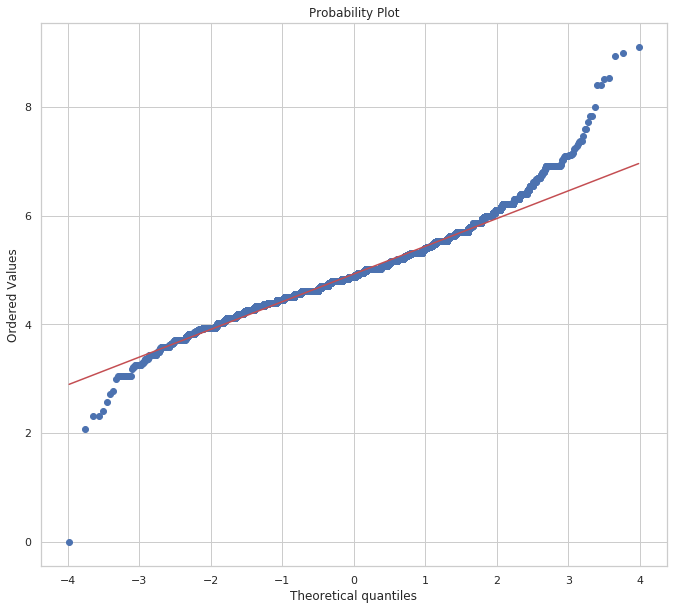

In [366]:
plt.figure(figsize=(10,10))
stats.probplot(data['price_log'],plot=plt)
plt.show()

**b. Drop non-nomial features**

Some non-nomial and origin price won't not be used then will eliminated because it doesn't contain prediction information

In [367]:
model_data = data.drop(["id", "name", "host_id", "host_name", "last_review", "price"], axis="columns")

In [368]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20244 entries, 0 to 20243
Data columns (total 10 columns):
neighbourhood                     20244 non-null int8
latitude                          20244 non-null float64
longitude                         20244 non-null float64
room_type                         20244 non-null int8
minimum_nights                    20244 non-null int64
number_of_reviews                 20244 non-null int64
reviews_per_month                 20244 non-null float64
calculated_host_listings_count    20244 non-null int64
availability_365                  20244 non-null int64
price_log                         20244 non-null float64
dtypes: float64(4), int64(4), int8(2)
memory usage: 1.3 MB


### 4.1 What do features take effects to AirBnb housing prices?

**Correlation metrix**

Now is the time to look detail on the feature correlations. Correlation matrix will be created:

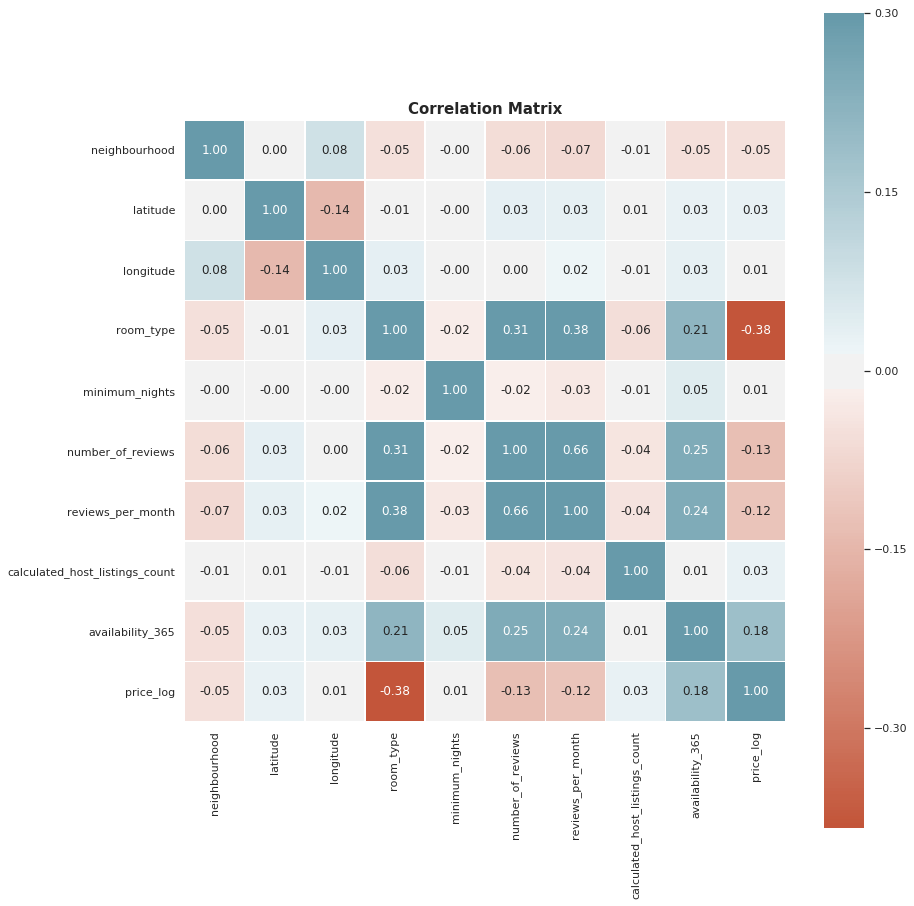

In [369]:
plt.figure(figsize=(12,15))
palette = sb.diverging_palette(20, 220, n=256)
corr=model_data.corr()
sb.heatmap(corr, 
           annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, 
           linewidths=.5
        )
plt.title("Correlation Matrix",size=15, weight='bold')
plt.show()

Correlation table shows there is no strong enough relationship between features and price_log. This indicates no feature needed to be taken out of data. This relationship will be found with feature_importances method

**Residual Plots**

Residual Plot is strong method to detect outliers, non-linear data and detecting data for regression models. The below charts show the residual plots for each feature with the price.

An ideal Residual Plot, the red line would be horizontal. Based on the below charts, most features are non-linear. On the other hand, there are not many outliers in each feature. This result led to underfitting. Underfitting can occur when input features do not have a strong relationship to target variables or over-regularized. For avoiding underfitting new data features can be added or regularization weight could be reduced.

In this kernel, since the input feature data could not be increased, Regularized Linear Models will be used for regularization and polynomial transformation will be made to avoid underfitting.

In [458]:
model_X, model_y = model_data.iloc[:,:-1], model_data.iloc[:,-1]
model_X

,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14,52.36575,4.94142,2,3,269,2.11,1,70
1,4,52.36509,4.89354,2,1,288,2.48,2,167
2,5,52.37297,4.88339,0,14,3,0.15,2,58
3,5,52.38673,4.89208,2,2,200,2.14,1,264
4,5,52.36719,4.89092,2,2,295,2.67,3,123
...,...,...,...,...,...,...,...,...,...
20239,5,52.37606,4.88895,0,5,0,0.00,2,353
20240,4,52.36307,4.88665,0,5,0,0.00,2,344
20241,18,52.36014,4.84255,2,1,0,0.00,1,3
20242,4,52.36191,4.88957,3,1,0,0.00,1,85


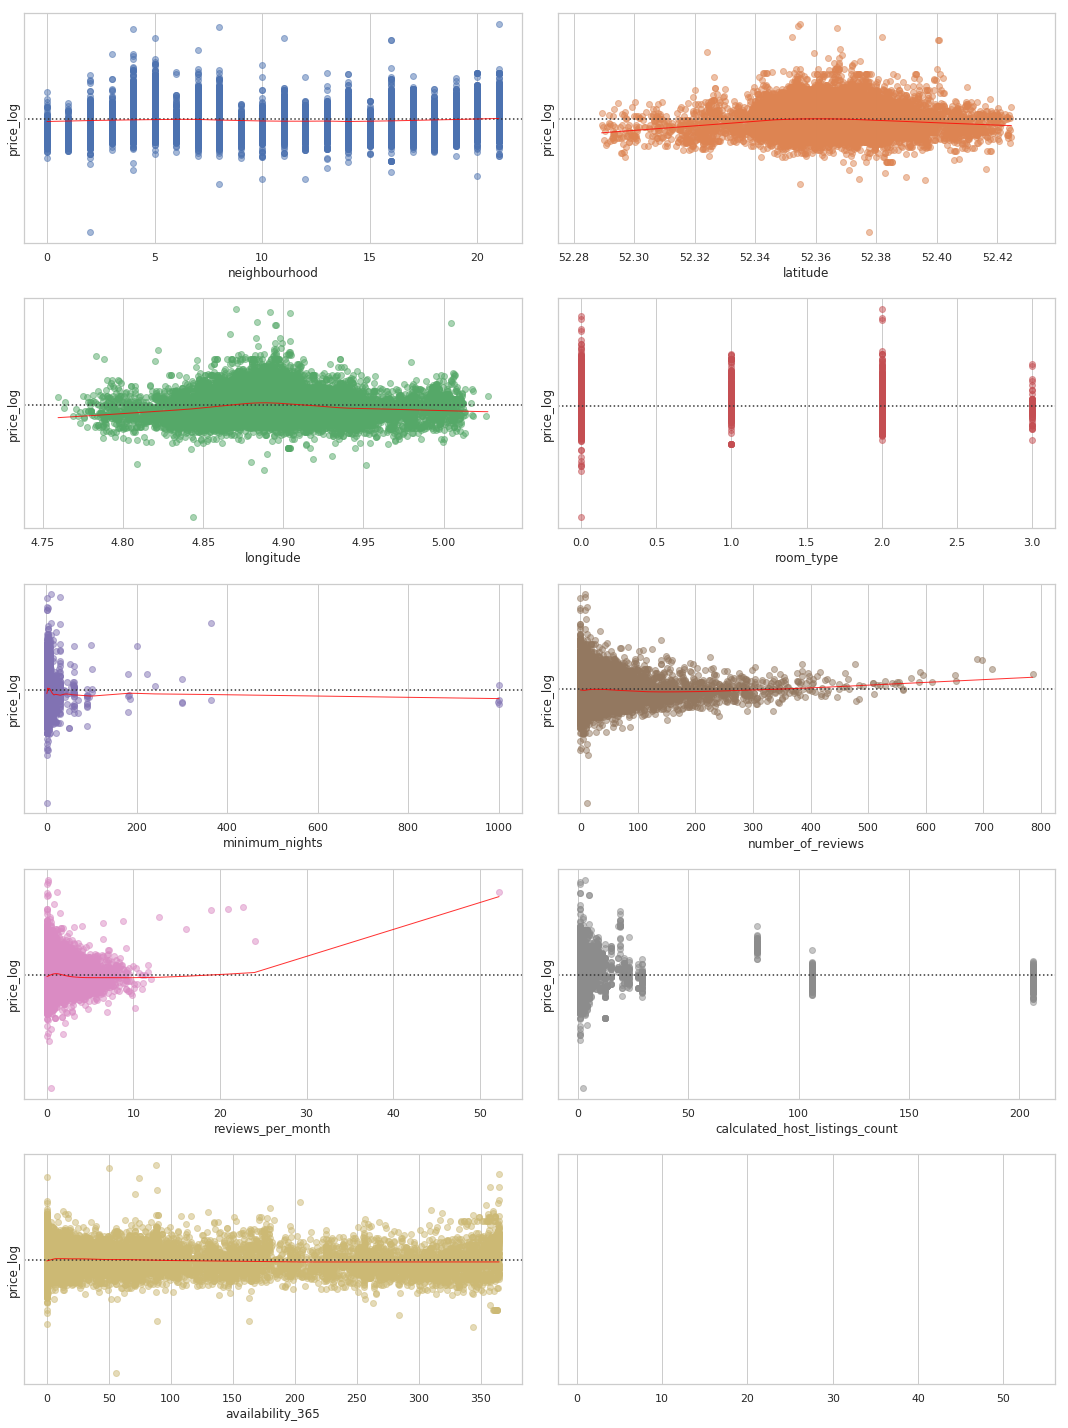

In [459]:
f, axes = plt.subplots(5, 2, figsize=(15, 20))
sb.residplot(model_X.iloc[:,0],model_y, lowess=True, ax=axes[0, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sb.residplot(model_X.iloc[:,1],model_y, lowess=True, ax=axes[0, 1],
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sb.residplot(model_X.iloc[:,2],model_y, lowess=True, ax=axes[1, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sb.residplot(model_X.iloc[:,3],model_y, lowess=True, ax=axes[1, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sb.residplot(model_X.iloc[:,4],model_y, lowess=True, ax=axes[2, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sb.residplot(model_X.iloc[:,5],model_y, lowess=True, ax=axes[2, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sb.residplot(model_X.iloc[:,6],model_y, lowess=True, ax=axes[3, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sb.residplot(model_X.iloc[:,7],model_y, lowess=True, ax=axes[3, 1], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
sb.residplot(model_X.iloc[:,8],model_y, lowess=True, ax=axes[4, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.setp(axes, yticks=[])
plt.tight_layout()

**Feature Selection and GridSearch**

First, we will use **ColumnTransformer** technique to normalize dataset.

In [460]:
model_data.columns
X = model_data[['neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count',"availability_365"]]
y = model_data['price_log']

,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log
0,14,52.36575,4.94142,2,3,269,2.11,1,70,4.094345
1,4,52.36509,4.89354,2,1,288,2.48,2,167,4.394449
2,5,52.37297,4.88339,0,14,3,0.15,2,58,4.836282
3,5,52.38673,4.89208,2,2,200,2.14,1,264,5.049856
4,5,52.36719,4.89092,2,2,295,2.67,3,123,4.330733
...,...,...,...,...,...,...,...,...,...,...
20239,5,52.37606,4.88895,0,5,0,0.00,2,353,5.860786
20240,4,52.36307,4.88665,0,5,0,0.00,2,344,5.303305
20241,18,52.36014,4.84255,2,1,0,0.00,1,3,3.931826
20242,4,52.36191,4.88957,3,1,0,0.00,1,85,4.828314


In [461]:
from sklearn.preprocessing import LabelEncoder
CATEGORICAL_FEATURES = ["room_type", "neighbourhood"]
ct = ColumnTransformer(
            [('oh_enc', OneHotEncoder(handle_unknown="ignore"), CATEGORICAL_FEATURES)],
#             [('oh_enc', LabelEncoder(), CATEGORICAL_FEATURES)],
            remainder=StandardScaler()
        )
Xt = ct.fit_transform(X)

### 4.2 Build model

In [462]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
# from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR, SVC, LinearSVC  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_squared_error as MSE

In [463]:
seed = 11
pipelines = []

pipelines.append(
                ("Ridge", 
                 Pipeline([
                      
                     ("Ridge", Ridge(random_state=seed, tol=10 ))
                      ]))
                )
pipelines.append(
                ("Lasso", 
                 Pipeline([
                      
                     ("Lasso", Lasso(random_state=seed, tol=1))
                      ]))
                )
pipelines.append(
                ("Elastic", 
                 Pipeline([
                      
                     ("Lasso", ElasticNet(random_state=seed))
                      ]))
                )

# pipelines.append(
#                 ("SVR",
#                  Pipeline([
#                      
#                      ("SVR",  SVR(kernel='linear', C=1e2, degree=5))
#                  ])
#                 )
#                 )

pipelines.append(
                ("RF_reg",
                 Pipeline([
                     
                     ("RF", RandomForestRegressor(random_state=seed))
                 ])
                )
                )

pipelines.append(
                ("ET_reg",
                 Pipeline([
                     
                     ("ET", ExtraTreesRegressor(random_state=seed))
                 ])
                )
                )
pipelines.append(
                ("BR_reg",
                 Pipeline([
                     
                     ("BR", BaggingRegressor(random_state=seed))
                 ]))) 

pipelines.append(
                ("Hub-Reg",
                 Pipeline([
                     
                     ("Hub-Reg", HuberRegressor())
                 ]))) 
# pipelines.append(
#                 ("BayRidge",
#                  Pipeline([
                     
#                      ("BR", BayesianRidge())
#                  ]))) 


pipelines.append(
                ("DT_reg",
                 Pipeline([
                     
                     ("DT_reg", DecisionTreeRegressor())
                 ]))) 

pipelines.append(
                ("KNN_reg",
                 Pipeline([
                     
                     ("KNN_reg", KNeighborsRegressor())
                 ])))

pipelines.append(
                ("Gboost-Reg",
                 Pipeline([
                     
                     ("GBoost-Reg", GradientBoostingRegressor())
                 ])))

# pipelines.append(
#                 ("RFR_PCA",
#                  Pipeline([
                     
#                      ("PCA", PCA(n_components=3)),
#                      ("XGB", RandomForestRegressor())
#                  ])))

In [464]:
scoring = 'r2'
n_folds = 5

results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, random_state=seed)
    cv_results = cross_val_score(model, Xt, y, cv= kfold,
                                 scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)

Ridge: 0.188450 (+/- 0.043288)
Lasso: -0.019440 (+/- 0.020998)
Elastic: -0.019440 (+/- 0.020998)
RF_reg: 0.254535 (+/- 0.024082)
ET_reg: 0.225877 (+/- 0.019350)
BR_reg: 0.254928 (+/- 0.027720)
Hub-Reg: 0.266085 (+/- 0.025286)
DT_reg: -0.390393 (+/- 0.072873)
KNN_reg: 0.222151 (+/- 0.018342)
Gboost-Reg: 0.332684 (+/- 0.019979)


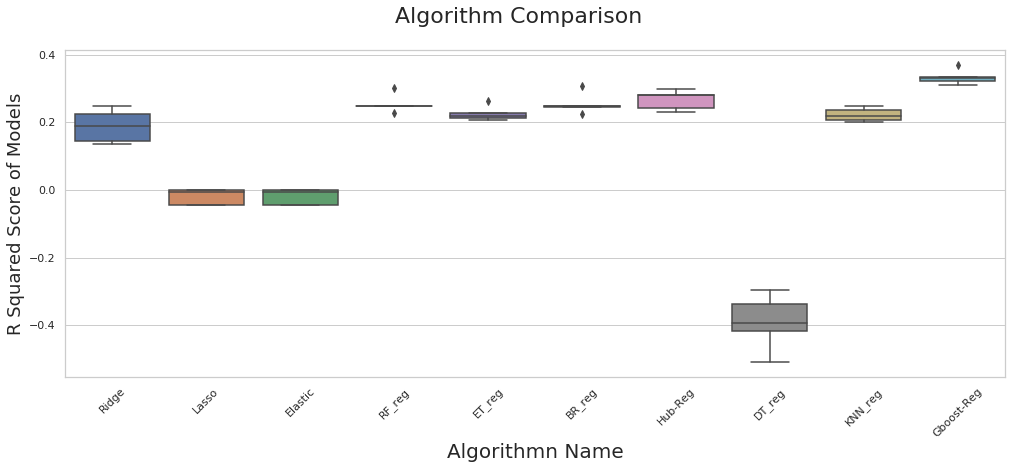

In [465]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparison', fontsize=22)
ax = fig.add_subplot(111)
sb.boxplot(x=names, y=results)
ax.set_xticklabels(names)
ax.set_xlabel("Algorithmn Name", fontsize=20)
ax.set_ylabel("R Squared Score of Models", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

Some of the top performance models are:

* **Gradient Boosting Regressor**: 0.333503
* **Scaled_BR_reg**: 0.252624

### 4.3 Training

Now we start training with the best model found above

In [466]:
X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.2,random_state=11)
X_train

<16195x33 sparse matrix of type '<class 'numpy.float64'>'
	with 145755 stored elements in Compressed Sparse Row format>

From the above residual plot, the polynomial transformation will be made with a second degree which adding the square of each feature.

In [467]:
Poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train = Poly.fit_transform(X_train)
X_test = Poly.fit_transform(X_test)

**Finetune best hyperparameters**

We use Radomize Search to help us tune the best hyper parameters for BGR model

In [468]:
from sklearn.model_selection import RandomizedSearchCV

In [469]:
random_grid = {
    "loss": ["ls", "lad","huber"],
    "n_estimators": [100,150,200],
    "max_depth": range(5, 16, 1)
}

In [470]:
gbr = GradientBoostingRegressor()
gbr_random = RandomizedSearchCV(estimator = gbr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
gbr_random.fit(X_train[:200], y_train[:200])

Fitting 3 folds for each of 99 candidates, totalling 297 fits


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 99 is smaller than n_iter=100. Running 99 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 297 out of 297 | elapsed:   44.9s finished
/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [471]:
gbr_random.best_params_

{'n_estimators': 150, 'max_depth': 8, 'loss': 'lad'}

Now we train with the full dataset

In [472]:
best_params = gbr_random.best_params_
gbr = GradientBoostingRegressor(n_estimators=best_params["n_estimators"],
                               max_depth=best_params["max_depth"],
                               loss=best_params["loss"])

In [473]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='lad', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [474]:
y_pred = gbr.predict(X_test)
y_test = np.exp(y_test)
y_pred = np.exp(y_pred)
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('RMSE: ',math.sqrt(mean_squared_error(y_test,y_pred)))

MAE:  54.01157142876341
MSE:  29668.35926558878
RMSE:  172.2450558523779


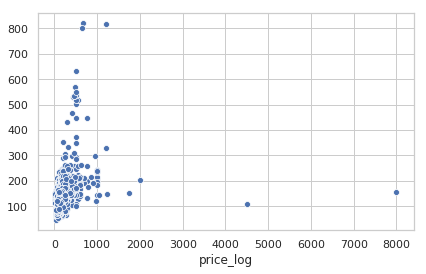

In [475]:
sb.scatterplot(y_test, y_pred)

## 5. Conclusion

**Summarizing our findings, suggesting other features**

* This Airbnb dataset for the 2019 year appeared to be a very rich dataset with a variety of columns that allowed us to do deep data exploration on each significant column presented. 

* First, we have been processing and transforming the dataset in order to clean and refine the data with actions, and do a lot of analysis with the data.
Further, we started Diagnostic Analysis section to shoe the most used tools of Data Scientists to see what happened and try to understand the past to take advantage in the future using "Matrix Correlation"

* Lastly, we got into price predictive model using the latest stack technology in order to predict the price of Airbnb's over the year. We have used Machine Learning as application of Artificial Intelligence (AI), and we also applied the most optimized and newest algorithms, trying "Gradient Boosted Regressor Model" where we got a positive results coming up with the generalized increase in prices in Amstedam city

* Overall, we discovered a very good number of interesting relationships between features and explained each step of the process. This data analytics is very much mimicked on a higher level on Airbnb Data/Machine Learning team for better business decisions, control over the platform, marketing initiatives, implementation of new features and much more